In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
obs = pd.read_csv('../Resources/observed_onset.csv')
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']
monthly_obs = pd.read_csv('../Resources/monthly_obs.csv')
observed_onset = pd.read_csv('../Resources/observed_onset.csv')

warm_mean_obs = pd.read_csv('../Resources/warm_mean_obs.csv')
neutral_mean_obs = pd.read_csv('../Resources/neutral_mean_obs.csv')
cold_mean_obs = pd.read_csv('../Resources/cold_mean_obs.csv')

gfdl_warm_mean = pd.read_csv('../Resources/gfdl_warm_mean.csv')
gfdl_neutral_mean = pd.read_csv('../Resources/gfdl_neutral_mean.csv')
gfdl_cold_mean = pd.read_csv('../Resources/gfdl_cold_mean.csv')


gfdl_warm_onset_mean= pd.read_csv('../Resources/gfdl_warm_onset_mean.csv')
gfdl_all_onset_mean= pd.read_csv('../Resources/gfdl_neutral_onset_mean.csv')
gfdl_cold_onset_mean= pd.read_csv('../Resources/gfdl_cold_onset_mean.csv')
gfdl_warm_onset = pd.read_csv('../Resources/gfdl_warm_onset.csv')
gfdl_all_onset = pd.read_csv ('../Resources/gfdl_neutral_onset.csv')
gfdl_cold_onset= pd.read_csv('../Resources/gfdl_cold_onset.csv')

#import model LDC data
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')
nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
canada = pd.read_csv('../Resources/CanSIPS_IC4_FULL_LDC.csv')
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
canada['LDC_SST_CanSIPS_IC4'] = canada['LDC_SST_CanSIPS_IC4'] - 273.15
canada['LDC_SST_CanSIPS_IC4_ONETWO'] = canada['LDC_SST_CanSIPS_IC4_ONETWO'] - 273.15
canada['LDC_SST_CanSIPS_IC4_THREE'] = canada['LDC_SST_CanSIPS_IC4_THREE'] - 273.15
canada['LDC_SST_CanSIPS_IC4_FOUR'] = canada['LDC_SST_CanSIPS_IC4_FOUR'] - 273.15
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
cola = pd.read_csv('../Resources/COLA_CESM1_FULL_LDC.csv')
cola_stat = pd.read_csv('../Resources/cola_stat.csv')

#import model LDC data for canadian sisters
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
canesm['LDC_SST_CanESM5_ONETWO'] = canesm['LDC_SST_CanESM5_ONETWO'] - 273.15
canesm['LDC_SST_CanESM5_THREE'] = canesm['LDC_SST_CanESM5_THREE'] - 273.15
canesm['LDC_SST_CanESM5_FOUR'] = canesm['LDC_SST_CanESM5_FOUR'] - 273.15
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15
nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')
nemo['LDC_SST_GEM52_NEMO_ONETWO'] = nemo['LDC_SST_GEM52_NEMO_ONETWO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_THREE'] = nemo['LDC_SST_GEM52_NEMO_THREE'] - 273.15
nemo['LDC_SST_GEM52_NEMO_FOUR'] = nemo['LDC_SST_GEM52_NEMO_FOUR'] - 273.15

#manage obs
obs.rename(columns={'YR': 'year', 'MON': 'month', 'DAY': 'day'}, inplace=True)
# Combine year, month, and day into a single datetime column
obs['TAR'] = pd.to_datetime(obs[['year', 'month', 'day']])
obs = obs[['TAR', 'OBS_NINO3.4_L3', 'OBS_PHASE']]
obs_dict = obs.set_index('TAR')['OBS_NINO3.4_L3'].to_dict()

#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
warm_onset_1 = {"year" : 1991, "month" : 6, "day" : 15}
warm_onset_2 = {"year" : 1994, "month" : 9, "day" : 15}
warm_onset_3 = {"year" : 1997, "month" : 5, "day" : 15}
warm_onset_4 = {"year" : 2002, "month" : 6, "day" : 15}
warm_onset_5 = {"year" : 2004, "month" : 7, "day" : 15}
warm_onset_6 = {"year" : 2006, "month" : 9, "day" : 15}
warm_onset_7 = {"year" : 2009, "month" : 7, "day" : 15}
warm_onset_8 = {"year" : 2014, "month" : 10, "day" : 15}
warm_onset_9 = {"year" : 2018, "month" : 9, "day" : 15}
#warm_onset_10 = {"year" : 2023, "month" : 5, "day" : 15}
warm_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9
               ]

cold_onset_1 = {"year" : 1995, "month" : 8, "day" : 15}
cold_onset_2 = {"year" : 1998, "month" : 7, "day" : 15}
cold_onset_3 = {"year" : 2005, "month" : 11, "day" : 15}
cold_onset_4 = {"year" : 2007, "month" : 6, "day" : 15}
cold_onset_5 = {"year" : 2008, "month" : 11, "day" : 15}
cold_onset_6 = {"year" : 2010, "month" : 6, "day" : 15}
cold_onset_7 = {"year" : 2011, "month" : 7, "day" : 15}
cold_onset_8 = {"year" : 2016, "month" : 8, "day" : 15}
cold_onset_9 = {"year" : 2017, "month" : 10, "day" : 15}
cold_onset_10 = {"year" : 2020, "month" : 8, "day" : 15}
cold_onsets = [cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

all_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9, 
              cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               cold_onset_10]

gfdl_ldv = pd.read_csv('../Resources/gfdl_ldv.csv')
nasa_ldv= pd.read_csv('../Resources/nasa_ldv.csv')
cola_ldv= pd.read_csv('../Resources/cola_ldv.csv')
ncep_ldv= pd.read_csv('../Resources/ncep_ldv.csv')
canada_ldv= pd.read_csv('../Resources/canada_ldv.csv')
nemo_ldv= pd.read_csv('../Resources/nemo_ldv.csv')
canesm_ldv= pd.read_csv('../Resources/canesm_ldv.csv')
nemo


,L,MON,LDC_SST_GEM52_NEMO,LDC_SST_GEM52_NEMO_ONETWO,LDC_SST_GEM52_NEMO_THREE,LDC_SST_GEM52_NEMO_FOUR
0,1.5,0000 1 Jan 1991,26.3129,25.5066,26.3145,28.2578
1,2.5,0000 1 Jan 1991,26.1866,25.9130,26.7943,27.8252
2,3.5,0000 1 Jan 1991,26.1609,25.1652,26.9304,27.5698
3,4.5,0000 1 Jan 1991,26.0031,23.8796,26.6901,27.3510
4,5.5,0000 1 Jan 1991,25.5370,22.5734,26.1638,27.0756
...,...,...,...,...,...,...
3595,6.5,0000 1 Dec 2020,25.0268,22.9459,26.4950,26.3518
3596,7.5,0000 1 Dec 2020,24.6830,22.1919,26.0063,26.1148
3597,8.5,0000 1 Dec 2020,24.3501,21.8093,25.6548,25.8609
3598,9.5,0000 1 Dec 2020,24.1440,21.8094,25.5399,25.6615


In [73]:
observed_onset['TAR'] = pd.to_datetime(observed_onset['YR'].astype(str) + '-' + 
                                       observed_onset['MON'].astype(str) + '-' + 
                                       observed_onset['DAY'].astype(str))
observed_onset = observed_onset[['YR','SZN','TAR','OBS_ANOM_L3']]
observed_onset

,YR,SZN,TAR,OBS_ANOM_L3
0,1991,DJF,1991-01-15,0.386667
1,1991,JFM,1991-02-15,0.280000
2,1991,FMA,1991-03-15,0.180000
3,1991,MAM,1991-04-15,0.160000
4,1991,AMJ,1991-05-15,0.323333
...,...,...,...,...
355,2020,JAS,2020-08-15,-0.573333
356,2020,ASO,2020-09-15,-0.893333
357,2020,SON,2020-10-15,-1.170000
358,2020,OND,2020-11-15,-1.276667


In [74]:
gfdl['MON'] = pd.to_datetime(gfdl['MON'], format = '%H%M %d %b %Y')
gfdl['START'] = gfdl['MON'].dt.month
gfdl['TARGET'] = ((gfdl['START'] + gfdl['L']).astype(int))%12
gfdl['TARGET'] = gfdl['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl['TAR'] = gfdl.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
gfdl['TAR'] = gfdl.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl['SZN'] = gfdl['TARGET'].map(month_to_season)
gfdl = gfdl[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GFDL_SPEAR']]


#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl['MEAN_SST_GFDL_SPEAR'] = gfdl.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl.reset_index(drop=True, inplace=True)
gfdl['ANOM'] = gfdl['LDC_SST_GFDL_SPEAR'] - gfdl['MEAN_SST_GFDL_SPEAR']
gfdl = gfdl[['L', 'MON', 'SZN','TAR', 'ANOM']]

gfdl


,L,MON,SZN,TAR,ANOM
0,1.5,1991-01-01,JFM,1991-02-15,-0.172926
1,2.5,1991-01-01,FMA,1991-03-15,-0.236823
2,3.5,1991-01-01,MAM,1991-04-15,-0.244186
3,4.5,1991-01-01,AMJ,1991-05-15,-0.248089
4,5.5,1991-01-01,MJJ,1991-06-15,-0.228925
...,...,...,...,...,...
3595,6.5,2020-12-01,MJJ,2021-06-15,-0.081730
3596,7.5,2020-12-01,JJA,2021-07-15,-0.125959
3597,8.5,2020-12-01,JAS,2021-08-15,-0.255304
3598,9.5,2020-12-01,ASO,2021-09-15,-0.373962


In [75]:
gfdl = gfdl.merge(observed_onset[['TAR', 'OBS_ANOM_L3']], on='TAR', how='left')

# Rename the merged OBS_ANOM_L3 column to OBS_ANOM
gfdl.rename(columns={'OBS_ANOM_L3': 'OBS_ANOM'}, inplace=True)
gfdl

,L,MON,SZN,TAR,ANOM,OBS_ANOM
0,1.5,1991-01-01,JFM,1991-02-15,-0.172926,0.280000
1,2.5,1991-01-01,FMA,1991-03-15,-0.236823,0.180000
2,3.5,1991-01-01,MAM,1991-04-15,-0.244186,0.160000
3,4.5,1991-01-01,AMJ,1991-05-15,-0.248089,0.323333
4,5.5,1991-01-01,MJJ,1991-06-15,-0.228925,0.513333
...,...,...,...,...,...,...
3595,6.5,2020-12-01,MJJ,2021-06-15,-0.081730,NaN
3596,7.5,2020-12-01,JJA,2021-07-15,-0.125959,NaN
3597,8.5,2020-12-01,JAS,2021-08-15,-0.255304,NaN
3598,9.5,2020-12-01,ASO,2021-09-15,-0.373962,NaN


In [76]:
def calculate_correlation(group):
    return group['ANOM'].corr(group['OBS_ANOM'])

correlation_results = gfdl.groupby(['L', 'SZN'])[['ANOM', 'OBS_ANOM']].apply(lambda x: x['ANOM'].corr(x['OBS_ANOM'])).reset_index()
correlation_results.rename(columns={0: 'CORR'}, inplace=True)

gfdl_anom_stat = correlation_results
gfdl_anom_stat

,L,SZN,CORR
0,1.5,AMJ,0.696695
1,1.5,ASO,0.899141
2,1.5,DJF,0.948250
3,1.5,FMA,0.928133
4,1.5,JAS,0.832313
...,...,...,...
115,10.5,MAM,0.521644
116,10.5,MJJ,0.295817
117,10.5,NDJ,0.531231
118,10.5,OND,0.454098


In [77]:
season_order = ['AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND']

# Filter the DataFrame to include only rows with 'SZN' in season_order
filtered_results = gfdl_anom_stat[gfdl_anom_stat['SZN'].isin(season_order)].copy()

# Convert 'SZN' to a categorical type with the specified order
filtered_results.loc[:, 'SZN'] = pd.Categorical(filtered_results['SZN'], categories=season_order, ordered=True)

# Sort the DataFrame by 'L' and 'SZN' according to the season order
gfdl_anom_stat = filtered_results.sort_values(by=['L', 'SZN']).reset_index(drop=True)
gfdl_anom_stat

,L,SZN,CORR
0,1.5,AMJ,0.696695
1,1.5,ASO,0.899141
2,1.5,JAS,0.832313
3,1.5,JJA,0.804551
4,1.5,MJJ,0.656930
...,...,...,...
65,10.5,JAS,0.322493
66,10.5,JJA,0.439255
67,10.5,MJJ,0.295817
68,10.5,OND,0.454098


In [78]:
gfdl_anom_mesh = gfdl_anom_stat.pivot(index='L', columns='SZN', values='CORR')
gfdl_anom_mesh = gfdl_anom_mesh.fillna(np.nan)
gfdl_anom_mesh = gfdl_anom_mesh.reindex(columns=season_order)
gfdl_anom_mesh
# Filter gfdl_anom_mesh to include only rows with L in [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
valid_L = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
filtered_gfdl_anom_mesh = gfdl_anom_mesh.loc[valid_L]

# Recompute the mean and std for filtered data
mean_values = filtered_gfdl_anom_mesh.mean(axis=0, skipna=True)
std_values = filtered_gfdl_anom_mesh.std(axis=0, skipna=True)

# Create a DataFrame to store the results
gfdl_anom_stats = pd.DataFrame({
    'MEAN': mean_values,
    'STD': std_values
})

print("Mean Correlation per SZN:\n", mean_values)
print("Standard Deviation of Correlation per SZN:\n", std_values)

# Flatten all values into a single array, ignoring NaNs
all_values = filtered_gfdl_anom_mesh.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # remove NaNs

# Calculate average of AMJ, MJJ, and JAS
amj_mjj_jas_avg = mean_values[['AMJ', 'MJJ', 'JAS']].mean()

# Calculate average of ASO, SON, and OND
aso_son_ond_avg = mean_values[['ASO', 'SON', 'OND']].mean()

print("Average for AMJ, MJJ, JAS:", amj_mjj_jas_avg)
print("Average for ASO, SON, OND:", aso_son_ond_avg)

# Compute overall mean and std for filtered data
overall_mean = all_values.mean()
overall_std = all_values.std()

print("Overall Mean across all SZN and L:", overall_mean)
print("Overall STD across all SZN and L:", overall_std)

gfdl_anom_mesh


Mean Correlation per SZN:
 SZN
AMJ    0.518369
MJJ    0.449659
JJA    0.531456
JAS    0.634235
ASO    0.727481
SON    0.787762
OND    0.823577
dtype: float64
Standard Deviation of Correlation per SZN:
 SZN
AMJ    0.104192
MJJ    0.116268
JJA    0.152390
JAS    0.143501
ASO    0.129204
SON    0.127388
OND    0.116741
dtype: float64
Average for AMJ, MJJ, JAS: 0.5340875317351189
Average for ASO, SON, OND: 0.7796066102335327
Overall Mean across all SZN and L: 0.6389340499964442
Overall STD across all SZN and L: 0.1790315543227072


SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.696695,0.656930,0.804551,0.832313,0.899141,0.944198,0.952180
2.5,0.607134,0.536250,0.625710,0.795937,0.848306,0.883331,0.919901
3.5,0.535289,0.481437,0.552037,0.675364,0.813562,0.865784,0.870409
4.5,0.507208,0.406055,0.517687,0.600571,0.723464,0.825302,0.856630
5.5,0.435525,0.378689,0.477842,0.562904,0.637058,0.750402,0.814672
6.5,0.431468,0.329505,0.393644,0.543191,0.593487,0.635872,0.741983
7.5,0.415262,0.358746,0.348721,0.429367,0.577349,0.609443,0.609262
8.5,0.411337,0.331011,0.379832,0.343549,0.449439,0.584747,0.588302
9.5,0.366510,0.361314,0.342907,0.381009,0.333847,0.460717,0.564013


In [79]:
cola['MON'] = pd.to_datetime(cola['MON'], format = '%H%M %d %b %Y')
cola['START'] = cola['MON'].dt.month
cola['TARGET'] = ((cola['START'] + cola['L']).astype(int))%12
cola['TARGET'] = cola['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola['TAR'] = cola.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
cola['TAR'] = cola.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola['SZN'] = cola['TARGET'].map(month_to_season)
cola = cola[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_COLA_CESM1']]


#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola['MEAN_SST_COLA_CESM1'] = cola.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola.reset_index(drop=True, inplace=True)
cola['ANOM'] = cola['LDC_SST_COLA_CESM1'] - cola['MEAN_SST_COLA_CESM1']
cola = cola[['L', 'MON', 'SZN','TAR', 'ANOM']]
cola = cola.merge(observed_onset[['TAR', 'OBS_ANOM_L3']], on='TAR', how='left')

# Rename the merged OBS_ANOM_L3 column to OBS_ANOM
cola.rename(columns={'OBS_ANOM_L3': 'OBS_ANOM'}, inplace=True)

correlation_results_cola = cola.groupby(['L', 'SZN'])[['ANOM', 'OBS_ANOM']].apply(lambda x: x['ANOM'].corr(x['OBS_ANOM'])).reset_index()
correlation_results_cola.rename(columns={0: 'CORR'}, inplace=True)

cola_anom_stat = correlation_results_cola


season_order = ['AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND']

# Filter the DataFrame to include only rows with 'SZN' in season_order
filtered_results = cola_anom_stat[cola_anom_stat['SZN'].isin(season_order)].copy()

# Convert 'SZN' to a categorical type with the specified order
filtered_results.loc[:, 'SZN'] = pd.Categorical(filtered_results['SZN'], categories=season_order, ordered=True)

# Sort the DataFrame by 'L' and 'SZN' according to the season order
cola_anom_stat = filtered_results.sort_values(by=['L', 'SZN']).reset_index(drop=True)
cola_anom_mesh = cola_anom_stat.pivot(index='L', columns='SZN', values='CORR')
cola_anom_mesh = cola_anom_mesh.fillna(np.nan)
cola_anom_mesh = cola_anom_mesh.reindex(columns=season_order)
cola_anom_mesh

# Filter cola_anom_mesh to include only rows with L in [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
valid_L = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
filtered_cola_anom_mesh = cola_anom_mesh.loc[valid_L]

# Recompute the mean and std for filtered data
mean_values = filtered_cola_anom_mesh.mean(axis=0, skipna=True)
std_values = filtered_cola_anom_mesh.std(axis=0, skipna=True)

# Create a DataFrame to store the results
cola_anom_stats = pd.DataFrame({
    'MEAN': mean_values,
    'STD': std_values
})

print("Mean Correlation per SZN:\n", mean_values)
print("Standard Deviation of Correlation per SZN:\n", std_values)

# Flatten all values into a single array, ignoring NaNs
all_values = filtered_cola_anom_mesh.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # remove NaNs

# Calculate average of AMJ, MJJ, and JAS
amj_mjj_jas_avg = mean_values[['AMJ', 'MJJ', 'JAS']].mean()

# Calculate average of ASO, SON, and OND
aso_son_ond_avg = mean_values[['ASO', 'SON', 'OND']].mean()

print("Average for AMJ, MJJ, JAS:", amj_mjj_jas_avg)
print("Average for ASO, SON, OND:", aso_son_ond_avg)

# Compute overall mean and std for filtered data
overall_mean = all_values.mean()
overall_std = all_values.std()

print("Overall Mean across all SZN and L:", overall_mean)
print("Overall STD across all SZN and L:", overall_std)

cola_anom_mesh


Mean Correlation per SZN:
 SZN
AMJ    0.685233
MJJ    0.638455
JJA    0.665221
JAS    0.722219
ASO    0.780468
SON    0.831828
OND    0.865888
dtype: float64
Standard Deviation of Correlation per SZN:
 SZN
AMJ    0.120742
MJJ    0.140726
JJA    0.137656
JAS    0.103793
ASO    0.086130
SON    0.082944
OND    0.067612
dtype: float64
Average for AMJ, MJJ, JAS: 0.6819690104439268
Average for ASO, SON, OND: 0.8260611051726992
Overall Mean across all SZN and L: 0.7413301710839192
Overall STD across all SZN and L: 0.12886584320439312


SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.842298,0.797954,0.791599,0.799001,0.877504,0.943762,0.952411
2.5,0.807608,0.770160,0.799852,0.813884,0.824618,0.884867,0.935781
3.5,0.786282,0.728406,0.744055,0.819603,0.845855,0.850838,0.887770
4.5,0.597587,0.691199,0.706667,0.740712,0.829233,0.860551,0.848166
5.5,0.560427,0.504663,0.655813,0.698526,0.745881,0.833001,0.860570
6.5,0.590283,0.454992,0.514130,0.646616,0.691643,0.755519,0.821293
7.5,0.612146,0.521815,0.444429,0.537187,0.648538,0.694260,0.755222
8.5,0.521791,0.544517,0.528646,0.424935,0.560554,0.656102,0.693105
9.5,0.463779,0.386028,0.519179,0.539246,0.420333,0.558986,0.653648


In [80]:
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada['TAR'] = canada.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canada['TAR'] = canada.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada['SZN'] = canada['TARGET'].map(month_to_season)
canada = canada[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanSIPS_IC4']]


#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada['MEAN_SST_CanSIPS_IC4'] = canada.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada.reset_index(drop=True, inplace=True)
canada['ANOM'] = canada['LDC_SST_CanSIPS_IC4'] - canada['MEAN_SST_CanSIPS_IC4']
canada = canada[['L', 'MON', 'SZN','TAR', 'ANOM']]
canada = canada.merge(observed_onset[['TAR', 'OBS_ANOM_L3']], on='TAR', how='left')

# Rename the merged OBS_ANOM_L3 column to OBS_ANOM
canada.rename(columns={'OBS_ANOM_L3': 'OBS_ANOM'}, inplace=True)

correlation_results_canada = canada.groupby(['L', 'SZN'])[['ANOM', 'OBS_ANOM']].apply(lambda x: x['ANOM'].corr(x['OBS_ANOM'])).reset_index()
correlation_results_canada.rename(columns={0: 'CORR'}, inplace=True)

canada_anom_stat = correlation_results_canada


season_order = ['AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND']

# Filter the DataFrame to include only rows with 'SZN' in season_order
filtered_results = canada_anom_stat[canada_anom_stat['SZN'].isin(season_order)].copy()

# Convert 'SZN' to a categorical type with the specified order
filtered_results.loc[:, 'SZN'] = pd.Categorical(filtered_results['SZN'], categories=season_order, ordered=True)

# Sort the DataFrame by 'L' and 'SZN' according to the season order
canada_anom_stat = filtered_results.sort_values(by=['L', 'SZN']).reset_index(drop=True)
canada_anom_mesh = canada_anom_stat.pivot(index='L', columns='SZN', values='CORR')
canada_anom_mesh = canada_anom_mesh.reindex(columns=season_order)
canada_anom_mesh = canada_anom_mesh.fillna(np.nan)
# Filter canada_anom_mesh to include only rows with L in [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
valid_L = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
filtered_canada_anom_mesh = canada_anom_mesh.loc[valid_L]

# Recompute the mean and std for filtered data
mean_values = filtered_canada_anom_mesh.mean(axis=0, skipna=True)
std_values = filtered_canada_anom_mesh.std(axis=0, skipna=True)

# Create a DataFrame to store the results
canada_anom_stats = pd.DataFrame({
    'MEAN': mean_values,
    'STD': std_values
})

print("Mean Correlation per SZN:\n", mean_values)
print("Standard Deviation of Correlation per SZN:\n", std_values)

# Flatten all values into a single array, ignoring NaNs
all_values = filtered_canada_anom_mesh.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # remove NaNs

# Calculate average of AMJ, MJJ, and JAS
amj_mjj_jas_avg = mean_values[['AMJ', 'MJJ', 'JAS']].mean()

# Calculate average of ASO, SON, and OND
aso_son_ond_avg = mean_values[['ASO', 'SON', 'OND']].mean()

print("Average for AMJ, MJJ, JAS:", amj_mjj_jas_avg)
print("Average for ASO, SON, OND:", aso_son_ond_avg)

# Compute overall mean and std for filtered data
overall_mean = all_values.mean()
overall_std = all_values.std()

print("Overall Mean across all SZN and L:", overall_mean)
print("Overall STD across all SZN and L:", overall_std)

canada_anom_mesh




Mean Correlation per SZN:
 SZN
AMJ    0.817084
MJJ    0.762088
JJA    0.741254
JAS    0.759733
ASO    0.792818
SON    0.827982
OND    0.864725
dtype: float64
Standard Deviation of Correlation per SZN:
 SZN
AMJ    0.108856
MJJ    0.147184
JJA    0.156914
JAS    0.144549
ASO    0.130418
SON    0.126938
OND    0.103209
dtype: float64
Average for AMJ, MJJ, JAS: 0.7796349103872183
Average for ASO, SON, OND: 0.8285081918244059
Overall Mean across all SZN and L: 0.7950976127123547
Overall STD across all SZN and L: 0.12923813832337905


SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.939738,0.909344,0.934454,0.948229,0.960045,0.975714,0.978546
2.5,0.925645,0.897254,0.854569,0.904426,0.926446,0.936408,0.955080
3.5,0.916260,0.860303,0.827625,0.809581,0.877322,0.905892,0.909152
4.5,0.801596,0.841928,0.765401,0.761610,0.775360,0.868450,0.890478
5.5,0.731951,0.655604,0.744133,0.692683,0.719420,0.767728,0.866031
6.5,0.718735,0.587279,0.557301,0.676292,0.649559,0.705291,0.759757
7.5,0.685661,0.582904,0.505296,0.525311,0.641573,0.636390,0.694030
8.5,0.595745,0.570239,0.500542,0.472013,0.533801,0.620239,0.621601
9.5,0.571457,0.460901,0.500021,0.468545,0.475207,0.549856,0.585310


In [81]:
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo['TAR'] = nemo.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nemo['TAR'] = nemo.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo['SZN'] = nemo['TARGET'].map(month_to_season)
nemo = nemo[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GEM52_NEMO']]


#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo['MEAN_SST_GEM52_NEMO'] = nemo.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo.reset_index(drop=True, inplace=True)
nemo['ANOM'] = nemo['LDC_SST_GEM52_NEMO'] - nemo['MEAN_SST_GEM52_NEMO']
nemo = nemo[['L', 'MON', 'SZN','TAR', 'ANOM']]
nemo = nemo.merge(observed_onset[['TAR', 'OBS_ANOM_L3']], on='TAR', how='left')

# Rename the merged OBS_ANOM_L3 column to OBS_ANOM
nemo.rename(columns={'OBS_ANOM_L3': 'OBS_ANOM'}, inplace=True)

correlation_results_nemo = nemo.groupby(['L', 'SZN'])[['ANOM', 'OBS_ANOM']].apply(lambda x: x['ANOM'].corr(x['OBS_ANOM'])).reset_index()
correlation_results_nemo.rename(columns={0: 'CORR'}, inplace=True)

nemo_anom_stat = correlation_results_nemo


season_order = ['AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND']

# Filter the DataFrame to include only rows with 'SZN' in season_order
filtered_results = nemo_anom_stat[nemo_anom_stat['SZN'].isin(season_order)].copy()

# Convert 'SZN' to a categorical type with the specified order
filtered_results.loc[:, 'SZN'] = pd.Categorical(filtered_results['SZN'], categories=season_order, ordered=True)

# Sort the DataFrame by 'L' and 'SZN' according to the season order
nemo_anom_stat = filtered_results.sort_values(by=['L', 'SZN']).reset_index(drop=True)
nemo_anom_mesh = nemo_anom_stat.pivot(index='L', columns='SZN', values='CORR')
nemo_anom_mesh = nemo_anom_mesh.reindex(columns=season_order)
nemo_anom_mesh = nemo_anom_mesh.fillna(np.nan)

# Filter nemo_anom_mesh to include only rows with L in [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
valid_L = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
filtered_nemo_anom_mesh = nemo_anom_mesh.loc[valid_L]

# Recompute the mean and std for filtered data
mean_values = filtered_nemo_anom_mesh.mean(axis=0, skipna=True)
std_values = filtered_nemo_anom_mesh.std(axis=0, skipna=True)

# Create a DataFrame to store the results
nemo_anom_stats = pd.DataFrame({
    'MEAN': mean_values,
    'STD': std_values
})

print("Mean Correlation per SZN:\n", mean_values)
print("Standard Deviation of Correlation per SZN:\n", std_values)

# Flatten all values into a single array, ignoring NaNs
all_values = filtered_nemo_anom_mesh.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # remove NaNs

# Calculate average of AMJ, MJJ, and JAS
amj_mjj_jas_avg = mean_values[['AMJ', 'MJJ', 'JAS']].mean()

# Calculate average of ASO, SON, and OND
aso_son_ond_avg = mean_values[['ASO', 'SON', 'OND']].mean()

print("Average for AMJ, MJJ, JAS:", amj_mjj_jas_avg)
print("Average for ASO, SON, OND:", aso_son_ond_avg)

# Compute overall mean and std for filtered data
overall_mean = all_values.mean()
overall_std = all_values.std()

print("Overall Mean across all SZN and L:", overall_mean)
print("Overall STD across all SZN and L:", overall_std)

nemo_anom_mesh



Mean Correlation per SZN:
 SZN
AMJ    0.827229
MJJ    0.772044
JJA    0.744020
JAS    0.764122
ASO    0.795461
SON    0.836879
OND    0.875616
dtype: float64
Standard Deviation of Correlation per SZN:
 SZN
AMJ    0.088469
MJJ    0.125990
JJA    0.141396
JAS    0.137643
ASO    0.137971
SON    0.130521
OND    0.101798
dtype: float64
Average for AMJ, MJJ, JAS: 0.7877984605277776
Average for ASO, SON, OND: 0.8359853346532654
Overall Mean across all SZN and L: 0.8021958543807793
Overall STD across all SZN and L: 0.12334643578772607


/var/folders/tv/glndxbv153sfzyphty3bw9w80000gn/T/ipykernel_51988/1945584070.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nemo['MEAN_SST_GEM52_NEMO'] = nemo.set_index(['L', 'SZN']).index.map(multi_index_stat)
/var/folders/tv/glndxbv153sfzyphty3bw9w80000gn/T/ipykernel_51988/1945584070.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nemo['ANOM'] = nemo['LDC_SST_GEM52_NEMO'] - nemo['MEAN_SST_GEM52_NEMO']


SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.935658,0.900550,0.921687,0.952892,0.966924,0.983029,0.979530
2.5,0.907850,0.891108,0.855253,0.900237,0.937471,0.946887,0.968597
3.5,0.900326,0.839142,0.817889,0.822316,0.878935,0.922445,0.922447
4.5,0.828411,0.844465,0.741185,0.757580,0.796243,0.869995,0.909660
5.5,0.751665,0.698447,0.750131,0.673788,0.720321,0.794201,0.863014
6.5,0.736634,0.604132,0.602957,0.680046,0.632986,0.711714,0.788123
7.5,0.730060,0.626464,0.519035,0.561996,0.635346,0.629883,0.697942
8.5,0.648790,0.643121,0.557420,0.478153,0.546406,0.618831,0.625339
9.5,0.642287,0.537035,0.581887,0.515547,0.459207,0.552326,0.595478


In [82]:
canesm['MON'] = pd.to_datetime(canesm['MON'], format = '%H%M %d %b %Y')
canesm['START'] = canesm['MON'].dt.month
canesm['TARGET'] = ((canesm['START'] + canesm['L']).astype(int))%12
canesm['TARGET'] = canesm['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm['TAR'] = canesm.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canesm['TAR'] = canesm.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm['SZN'] = canesm['TARGET'].map(month_to_season)
canesm = canesm[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanESM5']]


#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm['MEAN_SST_CanESM5'] = canesm.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm.reset_index(drop=True, inplace=True)
canesm['ANOM'] = canesm['LDC_SST_CanESM5'] - canesm['MEAN_SST_CanESM5']
canesm = canesm[['L', 'MON', 'SZN','TAR', 'ANOM']]
canesm = canesm.merge(observed_onset[['TAR', 'OBS_ANOM_L3']], on='TAR', how='left')

# Rename the merged OBS_ANOM_L3 column to OBS_ANOM
canesm.rename(columns={'OBS_ANOM_L3': 'OBS_ANOM'}, inplace=True)

correlation_results_canesm = canesm.groupby(['L', 'SZN'])[['ANOM', 'OBS_ANOM']].apply(lambda x: x['ANOM'].corr(x['OBS_ANOM'])).reset_index()
correlation_results_canesm.rename(columns={0: 'CORR'}, inplace=True)

canesm_anom_stat = correlation_results_canesm


season_order = ['AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND']

# Filter the DataFrame to include only rows with 'SZN' in season_order
filtered_results = canesm_anom_stat[canesm_anom_stat['SZN'].isin(season_order)].copy()

# Convert 'SZN' to a categorical type with the specified order
filtered_results.loc[:, 'SZN'] = pd.Categorical(filtered_results['SZN'], categories=season_order, ordered=True)

# Sort the DataFrame by 'L' and 'SZN' according to the season order
canesm_anom_stat = filtered_results.sort_values(by=['L', 'SZN']).reset_index(drop=True)
canesm_anom_mesh = canesm_anom_stat.pivot(index='L', columns='SZN', values='CORR')
canesm_anom_mesh = canesm_anom_mesh.reindex(columns=season_order)
canesm_anom_mesh = canesm_anom_mesh.fillna(np.nan)

# Filter canesm_anom_mesh to include only rows with L in [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
valid_L = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
filtered_canesm_anom_mesh = canesm_anom_mesh.loc[valid_L]

# Recompute the mean and std for filtered data
mean_values = filtered_canesm_anom_mesh.mean(axis=0, skipna=True)
std_values = filtered_canesm_anom_mesh.std(axis=0, skipna=True)

# Create a DataFrame to store the results
canesm_anom_stats = pd.DataFrame({
    'MEAN': mean_values,
    'STD': std_values
})

print("Mean Correlation per SZN:\n", mean_values)
print("Standard Deviation of Correlation per SZN:\n", std_values)

# Flatten all values into a single array, ignoring NaNs
all_values = filtered_canesm_anom_mesh.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # remove NaNs

# Calculate average of AMJ, MJJ, and JAS
amj_mjj_jas_avg = mean_values[['AMJ', 'MJJ', 'JAS']].mean()

# Calculate average of ASO, SON, and OND
aso_son_ond_avg = mean_values[['ASO', 'SON', 'OND']].mean()

print("Average for AMJ, MJJ, JAS:", amj_mjj_jas_avg)
print("Average for ASO, SON, OND:", aso_son_ond_avg)

# Compute overall mean and std for filtered data
overall_mean = all_values.mean()
overall_std = all_values.std()

print("Overall Mean across all SZN and L:", overall_mean)
print("Overall STD across all SZN and L:", overall_std)

canesm_anom_mesh



Mean Correlation per SZN:
 SZN
AMJ    0.712284
MJJ    0.639073
JJA    0.634966
JAS    0.656121
ASO    0.710086
SON    0.757812
OND    0.812848
dtype: float64
Standard Deviation of Correlation per SZN:
 SZN
AMJ    0.129010
MJJ    0.174324
JJA    0.199370
JAS    0.199989
ASO    0.175847
SON    0.170944
OND    0.136218
dtype: float64
Average for AMJ, MJJ, JAS: 0.669159416663649
Average for ASO, SON, OND: 0.7602490353519936
Overall Mean across all SZN and L: 0.7033130919926249
Overall STD across all SZN and L: 0.16997556122449992


SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.892722,0.849496,0.929572,0.914353,0.933364,0.950054,0.967291
2.5,0.833441,0.805148,0.762235,0.890062,0.883156,0.899361,0.916987
3.5,0.812279,0.748734,0.718020,0.690228,0.855926,0.858427,0.867165
4.5,0.596703,0.684507,0.672362,0.630857,0.652113,0.845500,0.841148
5.5,0.636990,0.431310,0.588678,0.593051,0.588749,0.653248,0.844853
6.5,0.633349,0.496989,0.355039,0.529027,0.545000,0.583893,0.659559
7.5,0.580504,0.457329,0.418859,0.345268,0.512297,0.514204,0.592935
8.5,0.507710,0.430221,0.344775,0.389395,0.384454,0.491947,0.492609
9.5,0.445688,0.349364,0.335698,0.318970,0.412550,0.420991,0.460519


In [83]:
ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep['TAR'] = ncep.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
ncep['TAR'] = ncep.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep['SZN'] = ncep['TARGET'].map(month_to_season)
ncep = ncep[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NCEP_CFSv2']]


#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep['MEAN_SST_NCEP_CFSv2'] = ncep.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep.reset_index(drop=True, inplace=True)
ncep['ANOM'] = ncep['LDC_SST_NCEP_CFSv2'] - ncep['MEAN_SST_NCEP_CFSv2']
ncep = ncep[['L', 'MON', 'SZN','TAR', 'ANOM']]
ncep = ncep.merge(observed_onset[['TAR', 'OBS_ANOM_L3']], on='TAR', how='left')

# Rename the merged OBS_ANOM_L3 column to OBS_ANOM
ncep.rename(columns={'OBS_ANOM_L3': 'OBS_ANOM'}, inplace=True)

correlation_results_ncep = ncep.groupby(['L', 'SZN'])[['ANOM', 'OBS_ANOM']].apply(lambda x: x['ANOM'].corr(x['OBS_ANOM'])).reset_index()
correlation_results_ncep.rename(columns={0: 'CORR'}, inplace=True)

ncep_anom_stat = correlation_results_ncep


season_order = ['AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND']

# Filter the DataFrame to include only rows with 'SZN' in season_order
filtered_results = ncep_anom_stat[ncep_anom_stat['SZN'].isin(season_order)].copy()

# Convert 'SZN' to a categorical type with the specified order
filtered_results.loc[:, 'SZN'] = pd.Categorical(filtered_results['SZN'], categories=season_order, ordered=True)

# Sort the DataFrame by 'L' and 'SZN' according to the season order
ncep_anom_stat = filtered_results.sort_values(by=['L', 'SZN']).reset_index(drop=True)
ncep_anom_mesh = ncep_anom_stat.pivot(index='L', columns='SZN', values='CORR')
new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_anom_mesh.columns)
ncep_anom_mesh = pd.concat([ncep_anom_mesh, new_rows])
ncep_anom_mesh.index.name = 'L'
ncep_anom_mesh = ncep_anom_mesh.reindex(columns=season_order)
ncep_anom_mesh = ncep_anom_mesh.fillna(np.nan)
# Filter ncep_anom_mesh to include only rows with L in [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
valid_L = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
filtered_ncep_anom_mesh = ncep_anom_mesh.loc[valid_L]

# Recompute the mean and std for filtered data
mean_values = filtered_ncep_anom_mesh.mean(axis=0, skipna=True)
std_values = filtered_ncep_anom_mesh.std(axis=0, skipna=True)

# Create a DataFrame to store the results
ncep_anom_stats = pd.DataFrame({
    'MEAN': mean_values,
    'STD': std_values
})

print("Mean Correlation per SZN:\n", mean_values)
print("Standard Deviation of Correlation per SZN:\n", std_values)

# Flatten all values into a single array, ignoring NaNs
all_values = filtered_ncep_anom_mesh.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # remove NaNs

# Calculate average of AMJ, MJJ, and JAS
amj_mjj_jas_avg = mean_values[['AMJ', 'MJJ', 'JAS']].mean()

# Calculate average of ASO, SON, and OND
aso_son_ond_avg = mean_values[['ASO', 'SON', 'OND']].mean()

print("Average for AMJ, MJJ, JAS:", amj_mjj_jas_avg)
print("Average for ASO, SON, OND:", aso_son_ond_avg)

# Compute overall mean and std for filtered data
overall_mean = all_values.mean()
overall_std = all_values.std()

print("Overall Mean across all SZN and L:", overall_mean)
print("Overall STD across all SZN and L:", overall_std)

ncep_anom_mesh


ncep_anom_mesh


Mean Correlation per SZN:
 SZN
AMJ    0.652296
MJJ    0.603728
JJA    0.610452
JAS    0.656026
ASO    0.716937
SON    0.786915
OND    0.834381
dtype: float64
Standard Deviation of Correlation per SZN:
 SZN
AMJ    0.058253
MJJ    0.115659
JJA    0.144291
JAS    0.154214
ASO    0.152754
SON    0.127888
OND    0.092026
dtype: float64
Average for AMJ, MJJ, JAS: 0.6373500940271931
Average for ASO, SON, OND: 0.7794107689029813
Overall Mean across all SZN and L: 0.6943907240368328
Overall STD across all SZN and L: 0.14195486110888533


SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.760302,0.807443,0.814076,0.801847,0.848987,0.912902,0.929393
2.5,0.673833,0.671527,0.785841,0.833644,0.832857,0.867132,0.911681
3.5,0.600743,0.556660,0.632631,0.790998,0.852454,0.857264,0.869338
4.5,0.618908,0.463447,0.509003,0.651305,0.789984,0.854560,0.852746
5.5,0.639372,0.512629,0.442722,0.525836,0.662676,0.789361,0.844195
6.5,0.679990,0.562762,0.494128,0.459889,0.543827,0.669325,0.773380
7.5,0.592926,0.651627,0.594765,0.528663,0.487772,0.557861,0.659930
8.5,0.604223,0.585002,0.641814,0.621401,0.559797,0.506415,0.551999
9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa['TAR'] = nasa.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nasa['TAR'] = nasa.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa['SZN'] = nasa['TARGET'].map(month_to_season)
nasa = nasa[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NASA_GEOSS2S']]


#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa['MEAN_SST_NASA_GEOSS2S'] = nasa.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa.reset_index(drop=True, inplace=True)
nasa['ANOM'] = nasa['LDC_SST_NASA_GEOSS2S'] - nasa['MEAN_SST_NASA_GEOSS2S']
nasa = nasa[['L', 'MON', 'SZN','TAR', 'ANOM']]
nasa = nasa.merge(observed_onset[['TAR', 'OBS_ANOM_L3']], on='TAR', how='left')

# Rename the merged OBS_ANOM_L3 column to OBS_ANOM
nasa.rename(columns={'OBS_ANOM_L3': 'OBS_ANOM'}, inplace=True)

correlation_results_nasa = nasa.groupby(['L', 'SZN'])[['ANOM', 'OBS_ANOM']].apply(lambda x: x['ANOM'].corr(x['OBS_ANOM'])).reset_index()
correlation_results_nasa.rename(columns={0: 'CORR'}, inplace=True)

nasa_anom_stat = correlation_results_nasa


season_order = ['AMJ', 'MJJ', 'JJA', 'JAS', 'ASO', 'SON', 'OND']

# Filter the DataFrame to include only rows with 'SZN' in season_order
filtered_results = nasa_anom_stat[nasa_anom_stat['SZN'].isin(season_order)].copy()

# Convert 'SZN' to a categorical type with the specified order
filtered_results.loc[:, 'SZN'] = pd.Categorical(filtered_results['SZN'], categories=season_order, ordered=True)

# Sort the DataFrame by 'L' and 'SZN' according to the season order
nasa_anom_stat = filtered_results.sort_values(by=['L', 'SZN']).reset_index(drop=True)
nasa_anom_mesh = nasa_anom_stat.pivot(index='L', columns='SZN', values='CORR')
new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_anom_mesh.columns)
nasa_anom_mesh = pd.concat([nasa_anom_mesh, new_rows])
nasa_anom_mesh.index.name = 'L'
nasa_anom_mesh = nasa_anom_mesh.reindex(columns=season_order)
nasa_anom_mesh = nasa_anom_mesh.fillna(np.nan)


# Filter nasa_anom_mesh to include only rows with L in [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
valid_L = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
filtered_nasa_anom_mesh = nasa_anom_mesh.loc[valid_L]

# Recompute the mean and std for filtered data
mean_values = filtered_nasa_anom_mesh.mean(axis=0, skipna=True)
std_values = filtered_nasa_anom_mesh.std(axis=0, skipna=True)

# Create a DataFrame to store the results
nasa_anom_stats = pd.DataFrame({
    'MEAN': mean_values,
    'STD': std_values
})

print("Mean Correlation per SZN:\n", mean_values)
print("Standard Deviation of Correlation per SZN:\n", std_values)

# Flatten all values into a single array, ignoring NaNs
all_values = filtered_nasa_anom_mesh.values.flatten()
all_values = all_values[~np.isnan(all_values)]  # remove NaNs

# Calculate average of AMJ, MJJ, and JAS
amj_mjj_jas_avg = mean_values[['AMJ', 'MJJ', 'JAS']].mean()

# Calculate average of ASO, SON, and OND
aso_son_ond_avg = mean_values[['ASO', 'SON', 'OND']].mean()

print("Average for AMJ, MJJ, JAS:", amj_mjj_jas_avg)
print("Average for ASO, SON, OND:", aso_son_ond_avg)

# Compute overall mean and std for filtered data
overall_mean = all_values.mean()
overall_std = all_values.std()

print("Overall Mean across all SZN and L:", overall_mean)
print("Overall STD across all SZN and L:", overall_std)

nasa_anom_mesh


Mean Correlation per SZN:
 SZN
AMJ    0.696774
MJJ    0.629493
JJA    0.666687
JAS    0.763865
ASO    0.830811
SON    0.844505
OND    0.866983
dtype: float64
Standard Deviation of Correlation per SZN:
 SZN
AMJ    0.143061
MJJ    0.177624
JJA    0.178747
JAS    0.149458
ASO    0.109347
SON    0.112968
OND    0.092934
dtype: float64
Average for AMJ, MJJ, JAS: 0.6967105293309827
Average for ASO, SON, OND: 0.8474326664195901
Overall Mean across all SZN and L: 0.7570166671911653
Overall STD across all SZN and L: 0.1572072372296989


SZN,AMJ,MJJ,JJA,JAS,ASO,SON,OND
L,,,,,,,
1.5,0.856852,0.806785,0.907274,0.942567,0.952270,0.949050,0.952795
2.5,0.869245,0.751949,0.785199,0.920153,0.938263,0.930465,0.927365
3.5,0.792280,0.761953,0.689391,0.826523,0.919552,0.927625,0.904768
4.5,0.681315,0.747036,0.684148,0.709642,0.833704,0.904440,0.916464
5.5,0.586665,0.529029,0.733171,0.683340,0.722335,0.813312,0.889055
6.5,0.555399,0.420506,0.488927,0.754388,0.684124,0.716384,0.782794
7.5,0.535662,0.389194,0.378699,0.510439,0.765428,0.670257,0.695638
8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


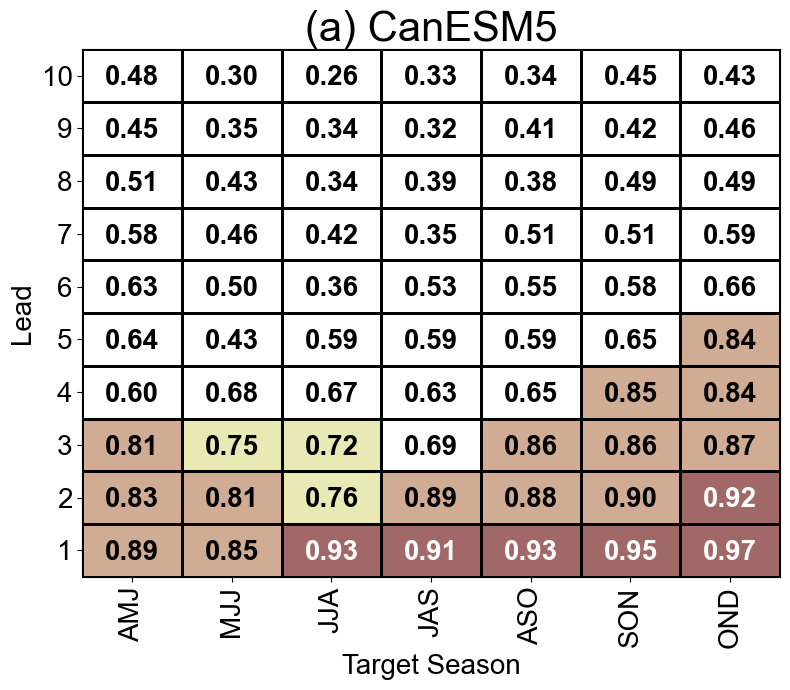

In [85]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(canesm_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries)
# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(a) CanESM5', size = 30)

# Adjust y-ticks to show original string labels
y_labels = canesm_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_anom_mesh.columns, rotation=90, size = 20)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/CORR/canesm_anom_correlation.svg', format='svg')

plt.show()





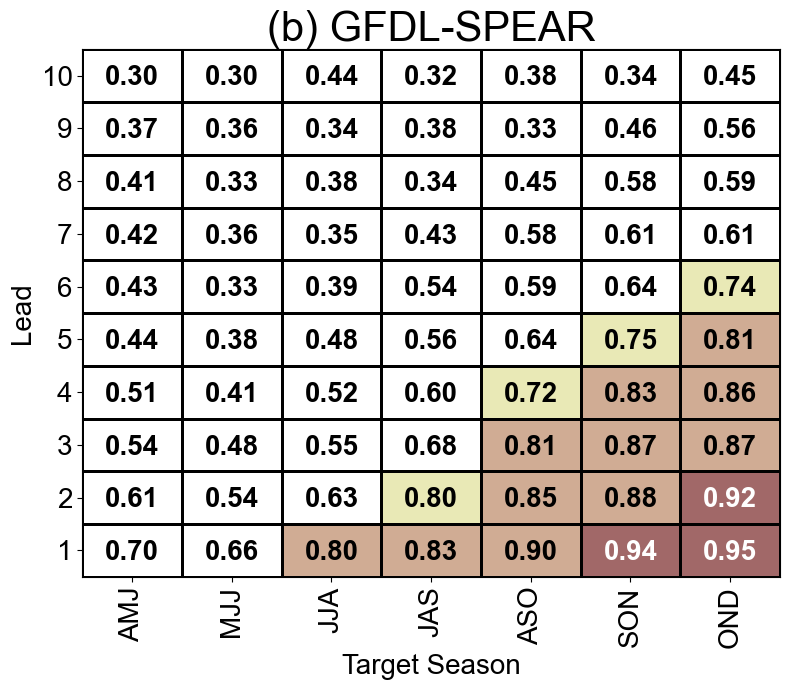

In [86]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(gfdl_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(gfdl_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries)
# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(b) GFDL-SPEAR', size = 30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_anom_mesh.columns, rotation=90, size = 20)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()

plt.savefig(f'../Plots/CORR/gfdl_anom_correlation.svg', format='svg')

plt.show()





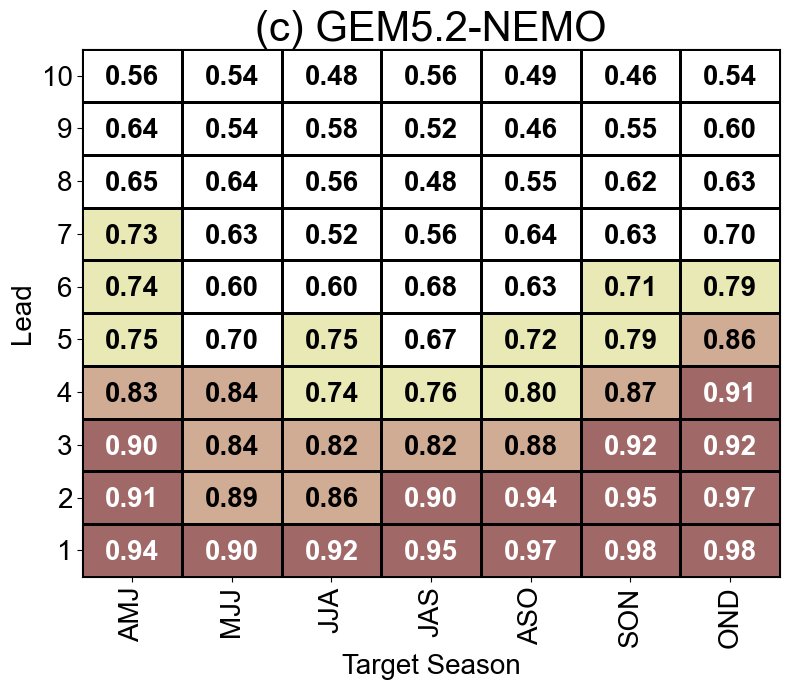

In [87]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(nemo_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nemo_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries)
# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(c) GEM5.2-NEMO',size = 30)

# Adjust y-ticks to show original string labels
y_labels = nemo_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_anom_mesh.columns, rotation=90, size = 20)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/CORR/nemo_anom_correlation.svg', format='svg')

plt.show()





In [88]:
# from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(cola_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(cola_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries)
# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(d) COLA-CESM1',size = 30)

# Adjust y-ticks to show original string labels
y_labels = cola_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)
plt.xticks(ticks=x, labels=cola_anom_mesh.columns, rotation=90, size = 20)
# Adjust x-ticks to show original string labels
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.0., f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/CORR/cola_anom_correlation.svg', format='svg')

plt.show()





SyntaxError: invalid syntax (318090168.py, line 43)

In [ ]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(canada_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canada_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries)
# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(e) CanSIPS-IC4',size = 30)

# Adjust y-ticks to show original string labels
y_labels = canada_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_anom_mesh.columns, rotation=90, size = 20)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/CORR/canada_anom_correlation.svg', format='svg')

plt.show()





In [ ]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(nasa_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries)
# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(f) NASA-GEOSS2S', size = 30)

# Adjust y-ticks to show original string labels
y_labels = nasa_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_anom_mesh.columns, rotation=90, size = 20)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/CORR/nasa_anom_correlation.svg', format='svg')

plt.show()





In [ ]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(ncep_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(ncep_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries)
# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(g) NCEP-CFSv2', size = 30)

# Adjust y-ticks to show original string labels
y_labels = ncep_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_anom_mesh.columns, rotation=90, size = 20)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/CORR/ncep_anom_correlation.svg', format='svg')

plt.show()





In [ ]:
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(nasa_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
cbar = plt.colorbar(c, label='Correlation', boundaries=boundaries, ticks=boundaries, orientation='horizontal')


# Add labels and title
plt.ylabel('Lead', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(f) NASA-GEOSS2S', size = 22)

# Adjust y-ticks to show original string labels
y_labels = nasa_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_anom_mesh.columns, rotation=90, size = 20)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
#plt.savefig(f'../Plots/CORR/errorbar.svg', format='svg')

plt.show()





In [ ]:
x = np.arange(len(nasa_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_anom_mesh.values

boundaries = np.arange(0.6, 1.1, 0.1)  # Boundaries from 0.6 to 1 with interval of 0.1
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,11))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
cbar = plt.colorbar(c, boundaries=boundaries, ticks=boundaries, orientation='horizontal')
cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Anomaly Correlation', fontsize=25)
cbar.set_label('Anomaly Correlation', fontsize=25)
cbar.ax.xaxis.set_label_coords(0.39, -1.5)
# Set custom tick labels
tick_labels = ['<0.7'] + [f'{b:.1f}' for b in boundaries[1:]]
cbar.ax.set_xticklabels(tick_labels)


# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=22)

# Adjust y-ticks to show original string labels
y_labels = nasa_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_anom_mesh.columns, rotation=90, size=15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/CORR/errorbar.svg', format='svg')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(nasa_anom_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_anom_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_anom_mesh.values

# Define boundaries ending at 1.0
boundaries = np.arange(0.6, 1.05, 0.1)  # Boundaries from 0.6 to 1.0 with interval of 0.1
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,6))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='pink_r', norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar with custom labels
cbar = plt.colorbar(c, label='Correlation', boundaries=boundaries, ticks=boundaries, orientation='horizontal', aspect=10, shrink=2)

# Set custom tick labels
tick_labels = ['<0.7'] + [f'{b:.1f}' for b in boundaries[1:]]
cbar.ax.set_xticklabels(tick_labels)

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=22)

# Adjust y-ticks to show original string labels
y_labels = nasa_anom_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_anom_mesh.columns, rotation=90, size=15)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('pink_r')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
#plt.savefig(f'../Plots/CORR/errorbar.svg', format='svg')

plt.show()
